<div align="center"> 
    Санкт-Петербургский государственный университет
</div>
<div align="center"> 
    Saint-Petersburg State University
</div>

<br/><br/>  <br/><br/>

<div align="center">  
    Кафедра физической механики
</div>

<center><b>Отчет</b></center>
<center><b>По лабораторной работе №7 <br/> Измерение отношения заряда электрона к постоянной Больцмана </b></center>
<br/><br/>  <br/><br/>
<center>Дисциплина <br/> Методы измерений и электромеханические системы <center>
    

<div align="right">  
    Выполнил: <br/> студент группы 251 <br/> Осянин Д.А.
</div>
    
  <center>Санкт-Петербург <br/> 2024 <center>

    


## Введение 

### Задачи лабораторной работы

1. Измерить зависимость тока короткого замыкания коллектора биполярного
транзистора от напряжения между эмиттером и базой. <br>
2. По результатам измерений определить отношение заряда электрона к
постоянной Больцмана. <br/>


## Основная часть 

### Установка

<img src="setup_7.jpg" alt="drawing" width="600"/>

На этой схеме БП – блок питания электрической схемы; – R1
ограничительный резистор; R2 – потенциометр, с помощью которого можно
изменять напряжение $U_{эб}$ ; V1 – вольтметр для измерения $U_{эб}$ ; R3 – резистор в
цепи к-б, по падению напряжения на котором можно измерить ток коллектора $I_{к}$; V2 – вольтметр для измерения падения напряжения $U_{эб}$ на R3. <br/>
Сопротивление резистора R3 выбрано достаточно малым (12,0Ом), чтобы
можно было считать цепь коллектора короткозамкнутой.<br/>
В установке используются следующие приборы и оборудование: цифровые
вольтметры, источник электрического питания УПУ-1У4, транзистор П702А.

### Обработка результатов 

Параметры макета: $t=24\pm 0.5^{\circ}C, \\ T = 297,15 К, \\ R_3 = 12\:Ом$

In [2]:
import pandas as pd
from math import log

r3 = 12
ub_data = pd.read_csv("U_b.csv", header=0)
ub_list = ub_data[ub_data.columns[0]].to_list()

uk_data = pd.read_csv("U_kb.csv", header=0)
uk_list = uk_data[uk_data.columns[0]].to_list()

Ik_list = [u/r3 * 10**3  for u in uk_list]
lnI_list = [log(i) for i in Ik_list] 

n0 = "№ п/п"
n1 = " $U_{эб}$  (В)"
n2 = "$U_{кб}$м (В)"
n3 =  " $I_k$=$U_{кб}/R_3 $ (мА)"
n4 = "  $\ln(I_k)$"

frame_table_1 = pd.DataFrame({n0: range(1, 17), n1:ub_list, n2: uk_list, n3: Ik_list, n4: lnI_list})
frame_table_1.to_csv("table_1.csv", index=False)

table = pd.read_csv("table_1.csv", index_col=0)
table



,$U_{эб}$ (В),$U_{кб}$м (В),$I_k$=$U_{кб}/R_3 $ (мА),$\ln(I_k)$
№ п/п,,,,
1,0.45,0.0039,0.325000,-1.123930
2,0.46,0.0068,0.566667,-0.567984
3,0.47,0.0090,0.750000,-0.287682
4,0.48,0.0145,1.208333,0.189242
5,0.49,0.0193,1.608333,0.475198
6,0.50,0.0344,2.866667,1.053150
7,0.51,0.0425,3.541667,1.264597
8,0.52,0.0491,4.091667,1.408952
9,0.53,0.0666,5.550000,1.713798


$I_k = I_0 \exp{\frac{e U_{эб}} {kT}}$ - ток короткого замыкания. <br/> 
Логарифмируя данное равенство получаем: $ \ln{I_k} = \ln{I_0} + \frac{e U_{эб}} {kT} $ <br/>
Таким образом $\tan{\alpha} = \frac{e}{kT} $ - тангенс угла наклона <br/>
е - заряд эклектрона, к - постоянная Больцмана. <br/> И таким образом отношение заряда электрона к постоянной Больцмана: $\frac{e}{k} = T \tan{\alpha}$ <br/>

Для оценки погрешности косвенных измерений используем данную формулу: 
$\Delta \frac{e}{k} = \sqrt{(\tan{\alpha})^2  (\frac{\Delta T}{3})^2 + T^2(\Delta \tan{\alpha})^2} $

In [3]:
T = 297,15
x_data = [x for x in ub_list]
y_data = lnI_list 

n0 = "No п/п"
n1 = "$x_{ll}$"
n2 = "$x_l$"
n3 = "прилежаший катет $x_{ll}-x_l$"
n4 = "$y_{ll}$"
n5 = "$y_l$"
n6 = "противолежащий $y_{ll} - y_l$"
n7 = "тангенс угла наклона     $a_i = \dfrac {y_{ll} - y_l}{x_{ll} - x_l}$"
n8 = "$a_i - \overline a$"
n9 = "квадратичное отклонение от среднего$(a_i - \overline a)^2$"


cl_1 = x_data[8:]
cl_2 = x_data[:8]
cl_3 = [round(cl_1[i] - cl_2[i], 10) for i in range(8)]
cl_4 = y_data[8:]
cl_5 = y_data[:8]
cl_6 = [cl_4[i] - cl_5[i] for i in range(8)]
cl_7 = [cl_6[i]/cl_3[i] for i in range(8)]
av_a = sum(cl_7)/len(cl_7)
cl_8 = [a - av_a for a in cl_7]
cl_9 = [a**2 for a in cl_8]


table_2 = pd.DataFrame({n0: range(1,9), n1: cl_1, n2: cl_2, 
    n3: cl_3, n4: cl_4, n5: cl_5, n6: cl_6,
            n7: cl_7, n8: cl_8, n9:cl_9 })

table_2.to_csv('table_2.scv', index=False)
table = pd.read_csv('table_2.scv', index_col = 0)

table

,$x_{ll}$,$x_l$,прилежаший катет $x_{ll}-x_l$,$y_{ll}$,$y_l$,противолежащий $y_{ll} - y_l$,тангенс угла наклона $a_i = \dfrac {y_{ll} - y_l}{x_{ll} - x_l}$,$a_i - \overline a$,квадратичное отклонение от среднего$(a_i - \overline a)^2$
No п/п,,,,,,,,,
1,0.53,0.45,0.08,1.713798,-1.123930,2.837728,35.471600,2.234083,4.991128
2,0.54,0.46,0.08,2.109203,-0.567984,2.677187,33.464833,0.227316,0.051672
3,0.55,0.47,0.08,2.474435,-0.287682,2.762117,34.526468,1.288951,1.661394
4,0.56,0.48,0.08,2.843940,0.189242,2.654698,33.183724,-0.053793,0.002894
5,0.57,0.49,0.08,3.284976,0.475198,2.809777,35.122215,1.884698,3.552085
6,0.58,0.50,0.08,3.580969,1.053150,2.527819,31.597744,-1.639774,2.688857
7,0.59,0.51,0.08,3.802952,1.264597,2.538354,31.729431,-1.508086,2.274323
8,0.60,0.52,0.08,3.873282,1.408952,2.464330,30.804122,-2.433395,5.921410


Построим прямую Y = A + BX, где B - наилучший угловой коэфицент <br/> 
$B = \tan{\alpha} = a = \overline a \pm \Delta a$ <br/>
$\overline a = \overline \tan{\alpha}$ <br/>
$\Delta a = \Delta \tan{\alpha} = t_{\alpha, n} \frac {s}{\sqrt{n}}$

Используем коэфицент Стьюдента $t_{0.9, 8} = 1,9 $ 

In [4]:
#считаем коэфиценты для для проймой, построенной методом парных точек
B = sum(cl_7)/len(cl_7)
A = sum([(cl_4[i]+cl_5[i])/2 - B*(cl_1[i]+cl_2[i])/2 for i in range(8)])/8

#погрешность тангенса угла наклона прямой
n = 8
delta_a = 1.9 * (sum(cl_9)/(n-1)/n)**0.5
print(f"delta a = {round(delta_a,5)}")


delta a = 1.16748


получаем $\Delta a = 1.16748$ и тогда $\tan{\alpha} = 33.237517 \pm 1.16748$ (с доверительной вероятностью 95%)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

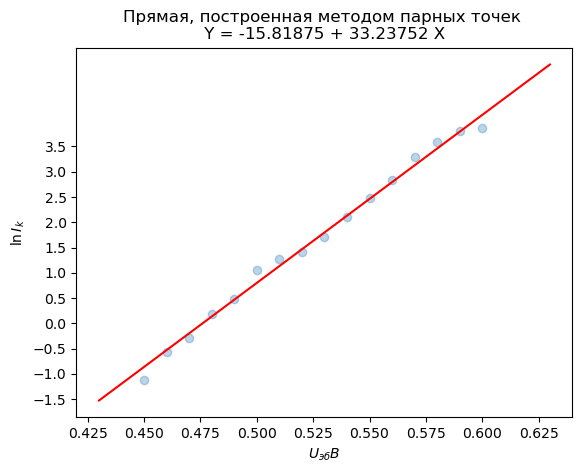

In [6]:
def f(x):
    return A+B*x
x_v = np.linspace(0.43,0.63,100)
y_v = f(x_v)

plt.plot(x_v,y_v, color = 'red')
plt.scatter(x_data,y_data, alpha = 0.3)

plt.yticks(np.arange(-1.5,4, 0.5))
plt.xlabel("$U_{эб} В$")
plt.ylabel("$\ln{I_k}$")
plt.title("Прямая, построенная методом парных точек \n Y = -15.81875 + 33.23752 X ")
# Настраиваем тики, чтобы они не пересекались с осями

plt.show()

In [7]:
frac = B*297.15
delta_frac = (B**2 * (0.5/3)**2 + 297.15**2 *(delta_a)**2)**0.5
print(f"e/k = {frac}", f" delta e/k = {delta_frac}")

e/k = 9876.5282008834  delta e/k = 346.96193513255776


Искомое отношение заряда электрона к постоянной Больцмана:
$\frac{e}k = 9876.5282008834 К/В $ <br/>
Погрешность косвенных измерений:<br/>
$\Delta \frac{e}k = 346.96193513255776 К/В$

### Вывод

В результате проделанной работы была измерена зависимость тока короткого замыкания коллектора транзистора от напряжения между эмиттером и базой и вычислен тангенс угла наклона полученной прямой. Также определено отношение заряда электрона к постоянной Больцмана и погрешность результата, как погрешность косвенных измерений.
